# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key, g_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "../output_data/cities_melendez.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)# Identify nearest city for each lat, lng combination


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
        
# Print the city count to confirm sufficient count
len(cities)


621

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities[0:5]

['vao', 'punta arenas', 'norman wells', 'kenai', 'belushya guba']

In [4]:
list(lat_lng)

[-79.48514589203461, -79.99125884691576]

In [5]:
# for lat_lng in lat_lngs:
#     print(lat_lng)

In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=2b6be0a3373ddc129ded8e4435cd8eae&units=imperial&q='

In [7]:
# # Get latitude and temperature for cities
# cities = []

# set up lists to hold reponse info
lats = []
longs = []
temperature = []
windspeed = []
pressures = []
humiditys = []
countries = []
dates = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city)
    
    if response.status_code == 200:    
        weathercity_data = response.json()
        
        #print(weathercity_data)
        
        try: 
            # extracting all data points 
            lat = weathercity_data['coord']['lat']
            lng = weathercity_data['coord']['lon']
            temperatures = weathercity_data['main']['temp']
            pressure = weathercity_data['main']['pressure']
            humidity = weathercity_data['main']['humidity']
            wind = weathercity_data['wind']['speed']
            country = weathercity_data["sys"]["country"]
            date = weathercity_data["dt"]
            
            
            lats.append(lat)
            longs.append(lng)
            temperature.append(temperatures)
            pressures.append(pressure)
            humiditys.append(humidity)
            windspeed.append(wind)
            countries.append(country)
            dates.append(date)
    
        except: 
            lats.append(np.nan)
            longs.append(np.nan)
            temperature.append(np.nan)
            windspeed.append(np.nan)
            pressures.append(np.nan)
            humiditys.append(np.nan)
            countries.append("")
            dates.append(np.nan)
            
    else:
        lats.append(np.nan)
        longs.append(np.nan)
        temperature.append(np.nan)
        windspeed.append(np.nan)
        pressures.append(np.nan)
        humiditys.append(np.nan)
        countries.append("")
        dates.append(np.nan)
        
    print(city)
    time.sleep(1)

vao
punta arenas
norman wells
kenai
belushya guba
hilo
villazon
port alfred
mount isa
busselton
indramayu
mataura
bredasdorp
yukhnov
cape town
felsberg
tabou
bluff
donskoye
dikson
saint-philippe
saldanha
jamestown
trebnje
hobart
miri
pisco
illoqqortoormiut
hithadhoo
baza
rikitea
namibe
pokhara
eirunepe
ushuaia
port elizabeth
teguldet
sorland
desaguadero
baykit
prince rupert
barrow
nanortalik
kapit
porto novo
airai
velsk
boma
elko
salinas
minab
chuy
hermanus
lebu
saint anthony
tuktoyaktuk
ostrovnoy
waddan
tsihombe
cap malheureux
kaitangata
thompson
upernavik
kasempa
butaritari
pattani
khrebtovaya
biak
puerto ayora
georgetown
lompoc
muros
zaragoza
taolanaro
coquimbo
saint george
dingle
sentyabrskiy
albany
qaanaaq
salalah
vaini
sakakah
avarua
magdiwang
chakia
boa viagem
khatanga
torbay
hay river
richards bay
gboko
general roca
kuito
tasiilaq
thai binh
eureka
zhigalovo
laguna
atuona
sinnamary
vanimo
oriximina
satitoa
bambanglipuro
cayenne
anar darreh
port lincoln
carnarvon
pevek
sterling
k

In [8]:
#weathercity_data["sys"]["country"]

In [9]:
#weathercity_data["dt"]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_datatable = pd.DataFrame()

weather_datatable["City"] = cities
weather_datatable["Country"] = countries
weather_datatable["Latitude"] = lats
weather_datatable["Longitude"] = longs
weather_datatable["Temp"] = temperature
weather_datatable["Wind"] = windspeed
weather_datatable["Pressure"] = pressures
weather_datatable["Humidity"] = humiditys
weather_datatable["Date"] = dates

weather_datatable

,City,Country,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date
0,vao,NC,-22.6667,167.4833,69.48,12.26,1014.0,80.0,1.630935e+09
1,punta arenas,CL,-53.1500,-70.9167,42.91,8.05,1016.0,81.0,1.630936e+09
2,norman wells,CA,65.2820,-126.8329,44.64,4.61,1000.0,100.0,1.630936e+09
3,kenai,US,60.5544,-151.2583,48.33,3.44,1008.0,89.0,1.630936e+09
4,belushya guba,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
616,grootfontein,NA,-19.5667,18.1167,90.97,6.91,1019.0,11.0,1.630936e+09
617,demba,CD,-5.5100,22.2667,89.08,0.49,1005.0,30.0,1.630936e+09
618,lazaro cardenas,MX,17.9583,-102.2000,76.24,5.30,1013.0,90.0,1.630936e+09
619,ibra,OM,22.6906,58.5334,101.66,13.09,1002.0,21.0,1.630936e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# weather_datatable.to_csv(output_data_file, index=False)

In [12]:
#  Get the indices of cities that have humidity over 100%.
mask = weather_datatable.Humidity > 100 
weather_datatable.loc[mask]

,City,Country,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [37]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sn

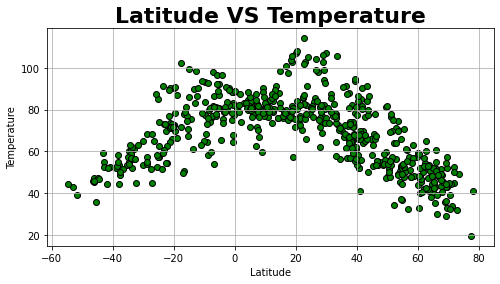

In [93]:
plt.figure(figsize=(8,4))
plt.scatter(weather_datatable.Latitude, weather_datatable.Temp, color='green', edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude VS Temperature", fontsize=22, fontweight="bold")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

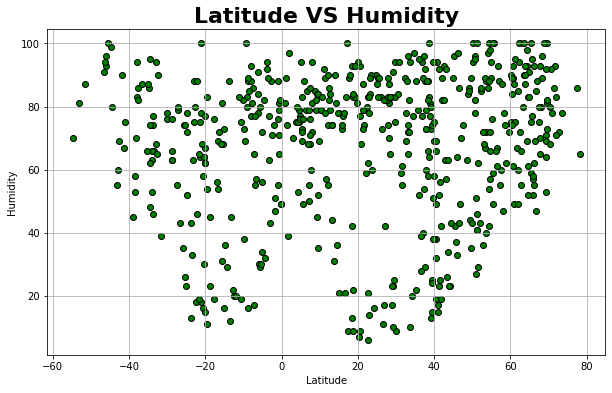

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(weather_datatable.Latitude, weather_datatable.Humidity, color='green', edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude VS Humidity", fontsize=22, fontweight="bold")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

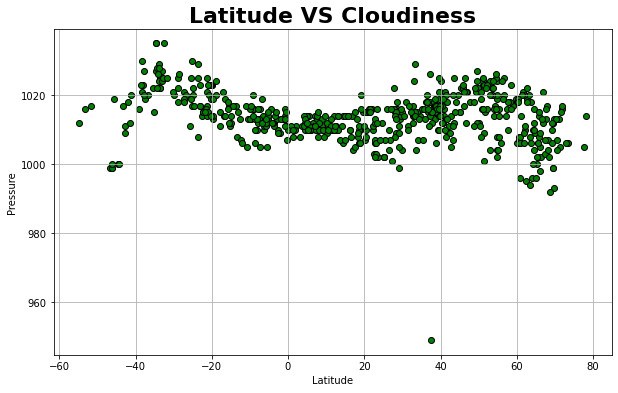

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(weather_datatable.Latitude, weather_datatable.Pressure, color='green', edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Pressure")
plt.title("Latitude VS Cloudiness", fontsize=22, fontweight="bold")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

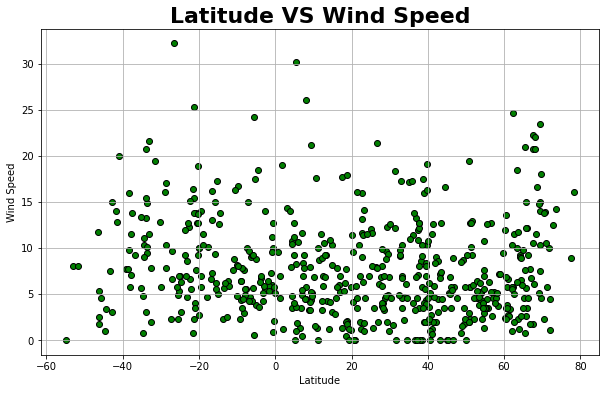

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(weather_datatable.Latitude, weather_datatable.Wind, color='green', edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude VS Wind Speed", fontsize=22, fontweight="bold")
plt.grid()
plt.show()

## Linear Regression

In [44]:
north_df = weather_datatable.loc[weather_datatable.Latitude >=0].reset_index(drop=True)
south_df = weather_datatable.loc[weather_datatable.Latitude <=0].reset_index(drop=True)

In [45]:
north_df.head()


,City,Country,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date
0,norman wells,CA,65.2820,-126.8329,44.64,4.61,1000.0,100.0,1.630936e+09
1,kenai,US,60.5544,-151.2583,48.33,3.44,1008.0,89.0,1.630936e+09
2,hilo,US,19.7297,-155.0900,71.73,5.75,1015.0,81.0,1.630936e+09
3,yukhnov,RU,54.7444,35.2297,52.63,7.56,1024.0,57.0,1.630936e+09
4,felsberg,DE,51.1333,9.4167,76.59,5.75,1023.0,46.0,1.630936e+09


In [46]:
south_df.head()

,City,Country,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date
0,vao,NC,-22.6667,167.4833,69.48,12.26,1014.0,80.0,1.630935e+09
1,punta arenas,CL,-53.1500,-70.9167,42.91,8.05,1016.0,81.0,1.630936e+09
2,villazon,BO,-22.0866,-65.5942,54.19,5.48,1015.0,46.0,1.630936e+09
3,port alfred,ZA,-33.5906,26.8910,60.40,14.85,1025.0,66.0,1.630936e+09
4,mount isa,AU,-20.7333,139.5000,65.97,13.80,1023.0,16.0,1.630936e+09


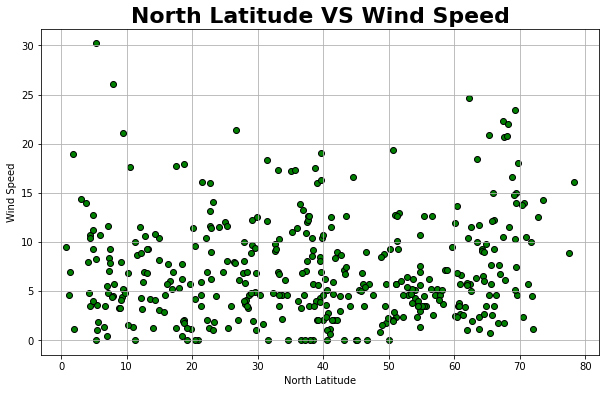

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(north_df.Latitude, north_df.Wind, color='green', edgecolor="black")
plt.xlabel("North Latitude")
plt.ylabel("Wind Speed")
plt.title("North Latitude VS Wind Speed", fontsize=22, fontweight="bold")
plt.grid()
plt.show()

In [48]:
north_df.corr()

,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date
Latitude,1.000000,-0.052754,-0.774137,0.062122,0.028798,0.089662,-0.051238
Longitude,-0.052754,1.000000,0.099507,0.198497,-0.036456,-0.056320,0.106566
Temp,-0.774137,0.099507,1.000000,0.047364,-0.057381,-0.436538,0.093694
Wind,0.062122,0.198497,0.047364,1.000000,-0.236916,-0.105154,0.005390
Pressure,0.028798,-0.036456,-0.057381,-0.236916,1.000000,-0.050654,0.120011
Humidity,0.089662,-0.056320,-0.436538,-0.105154,-0.050654,1.000000,-0.138122
Date,-0.051238,0.106566,0.093694,0.005390,0.120011,-0.138122,1.000000


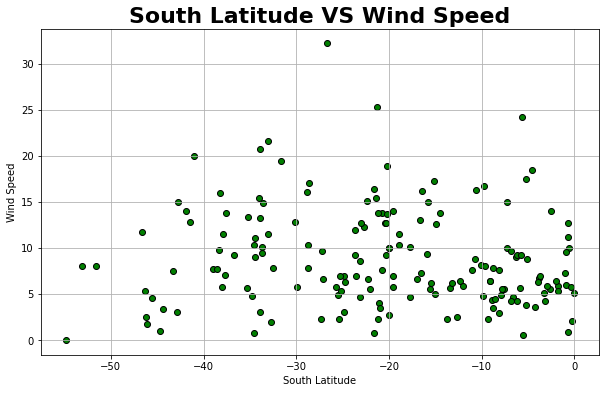

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(south_df.Latitude, south_df.Wind, color='green', edgecolor="black")
plt.xlabel("South Latitude")
plt.ylabel("Wind Speed")
plt.title("South Latitude VS Wind Speed", fontsize=22, fontweight="bold")
plt.grid()
plt.show()

In [50]:
import seaborn as sn
# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'Heatmap')

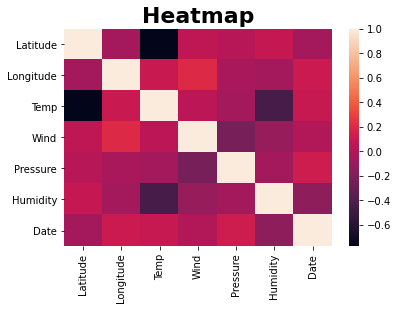

In [51]:
# sn.heatmap(north_df, cmap="Greens")
sn.heatmap(north_df.corr())
plt.title("Heatmap", fontsize=22, fontweight="bold")

Text(0.5, 1.0, 'Heatmap')

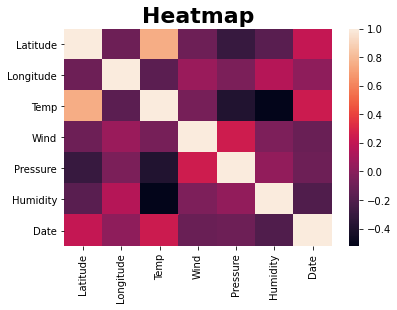

In [94]:
# sn.heatmap(south_df, cmap="Greens")
sn.heatmap(south_df.corr())
plt.title("Heatmap", fontsize=22, fontweight="bold")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5687696447059144
The r-squared is: 0.5992880140000305


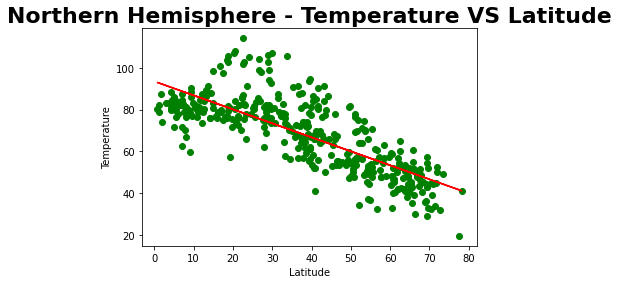

In [62]:
x_values = north_df['Latitude']
y_values = north_df['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Northern Hemisphere - Temperature VS Latitude", fontsize=22, fontweight="bold")
print(f"The r-squared is: {results.rsquared}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [61]:
feature = north_df[["Latitude"]]
target = north_df["Temp"]

In [53]:
In [41]:  # STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     224.2
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           7.19e-33
Time:                        09:07:58   Log-Likelihood:                -638.25
No. Observations:                 172   AIC:                             1281.
Df Residuals:                     170   BIC:                             1287.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.5081      1.373     63.012      0.000      83.798      89.218
Latitude       0.8378      0.056     14.974      0.000       0.727       0.948
==============================================================================
Omnibus:                        5.251   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.578
Skew:                           0.258   Prob(JB):                       0.0615
Kurtosis:                       3.716   Cond. No.                         44.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# SCIKIT_LEARN

reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
reg.coef_

array([0.83781722])

In [55]:
reg.intercept_

86.50807773317547

In [56]:
feature = south_df[["Latitude"]]
target = south_df["Temp"]

In [32]:
In [41]:  # STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     224.2
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           7.19e-33
Time:                        08:53:59   Log-Likelihood:                -638.25
No. Observations:                 172   AIC:                             1281.
Df Residuals:                     170   BIC:                             1287.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.5081      1.373     63.012      0.000      83.798      89.218
Latitude       0.8378      0.056     14.974      0.000       0.727       0.948
==============================================================================
Omnibus:                        5.251   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.578
Skew:                           0.258   Prob(JB):                       0.0615
Kurtosis:                       3.716   Cond. No.                         44.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: x and y must be the same size

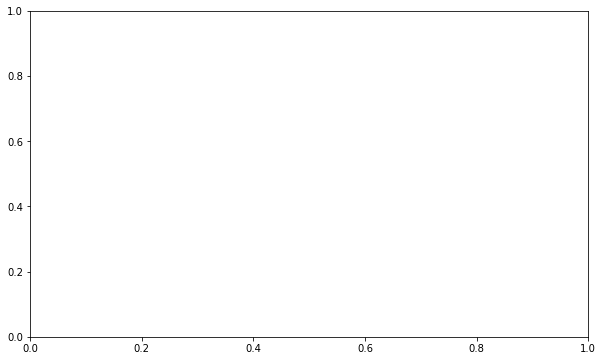

In [64]:
# predicted vs actual

plt.figure(figsize=(10,6))

plt.scatter(results.fittedvalues, north_df.Temp)
# plt.scatter(results.fittedvalues, north_df.Temp, color="green")

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.plot(north_df.Temp, north_df.Temp)

plt.show()

In [66]:
#MSE
np.mean((north_df.Temp - results.fittedvalues) **2)

493.4496066284204

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5687696447059142


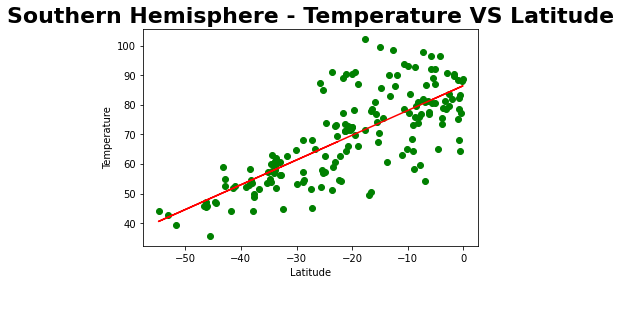

In [71]:
x_values = south_df['Latitude']
y_values = south_df['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere - Temperature VS Latitude", fontsize=22, fontweight="bold")
# print(f"The r-squared is: {results.rsquared}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [82]:
# Regression Latitude vs Temp - Southern Hemisphere
feature = south_df[["Latitude"]]
target = south_df["Temp"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     224.2
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           7.19e-33
Time:                        09:48:46   Log-Likelihood:                -638.25
No. Observations:                 172   AIC:                             1281.
Df Residuals:                     170   BIC:                             1287.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.5081      1.373     63.012      0.000      83.798      89.218
Latitude       0.8378      0.056     14.974      0.000       0.727       0.948
==============================================================================
Omnibus:                        5.251   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.578
Skew:                           0.258   Prob(JB):                       0.0615
Kurtosis:                       3.716   Cond. No.                         44.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008039239202616918


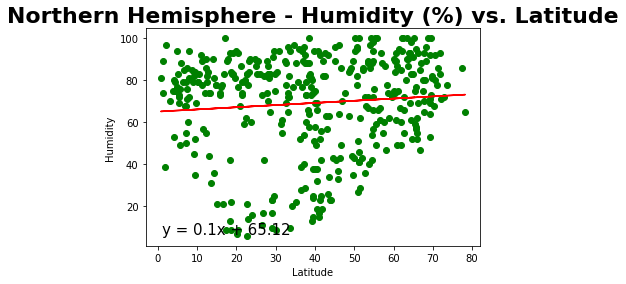

In [72]:
x_values = north_df['Latitude']
y_values = north_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude", fontsize=22, fontweight="bold")
# print(f"The r-squared is: {results.rsquared}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [83]:
# Regression Latitude vs Humidity - Northern Hemisphere
feature = north_df[["Latitude"]]
target = north_df["Humidity"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.193
Date:                Mon, 06 Sep 2021   Prob (F-statistic):             0.0747
Time:                        09:49:51   Log-Likelihood:                -1808.1
No. Observations:                 396   AIC:                             3620.
Df Residuals:                     394   BIC:                             3628.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.1168      2.509     25.954      0.000      60.184      70.049
Latitude       0.1033      0.058      1.787      0.075      -0.010       0.217
==============================================================================
Omnibus:                       44.848   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.504
Skew:                          -0.941   Prob(JB):                     1.98e-13
Kurtosis:                       2.940   Cond. No.                         93.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.027742329081400754


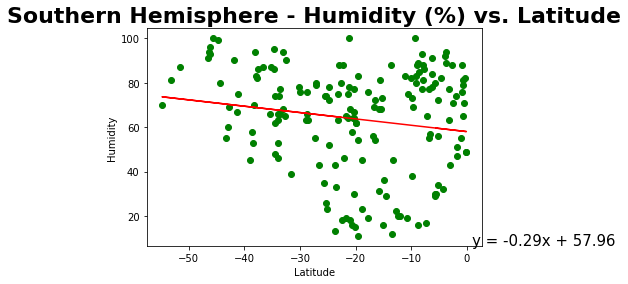

In [73]:
x_values = south_df['Latitude']
y_values = south_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude", fontsize=22, fontweight="bold")
# print(f"The r-squared is: {results.rsquared}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [80]:
# Regression Latitude vs Humidity - Southern Hemisphere
feature = south_df[["Latitude"]]
target = south_df["Humidity"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.851
Date:                Mon, 06 Sep 2021   Prob (F-statistic):             0.0290
Time:                        09:45:27   Log-Likelihood:                -783.06
No. Observations:                 172   AIC:                             1570.
Df Residuals:                     170   BIC:                             1576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9597      3.186     18.191      0.000      51.670      64.249
Latitude      -0.2860      0.130     -2.202      0.029      -0.542      -0.030
==============================================================================
Omnibus:                       14.371   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.710
Skew:                          -0.629   Prob(JB):                      0.00105
Kurtosis:                       2.426   Cond. No.                         44.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0008293481199383216


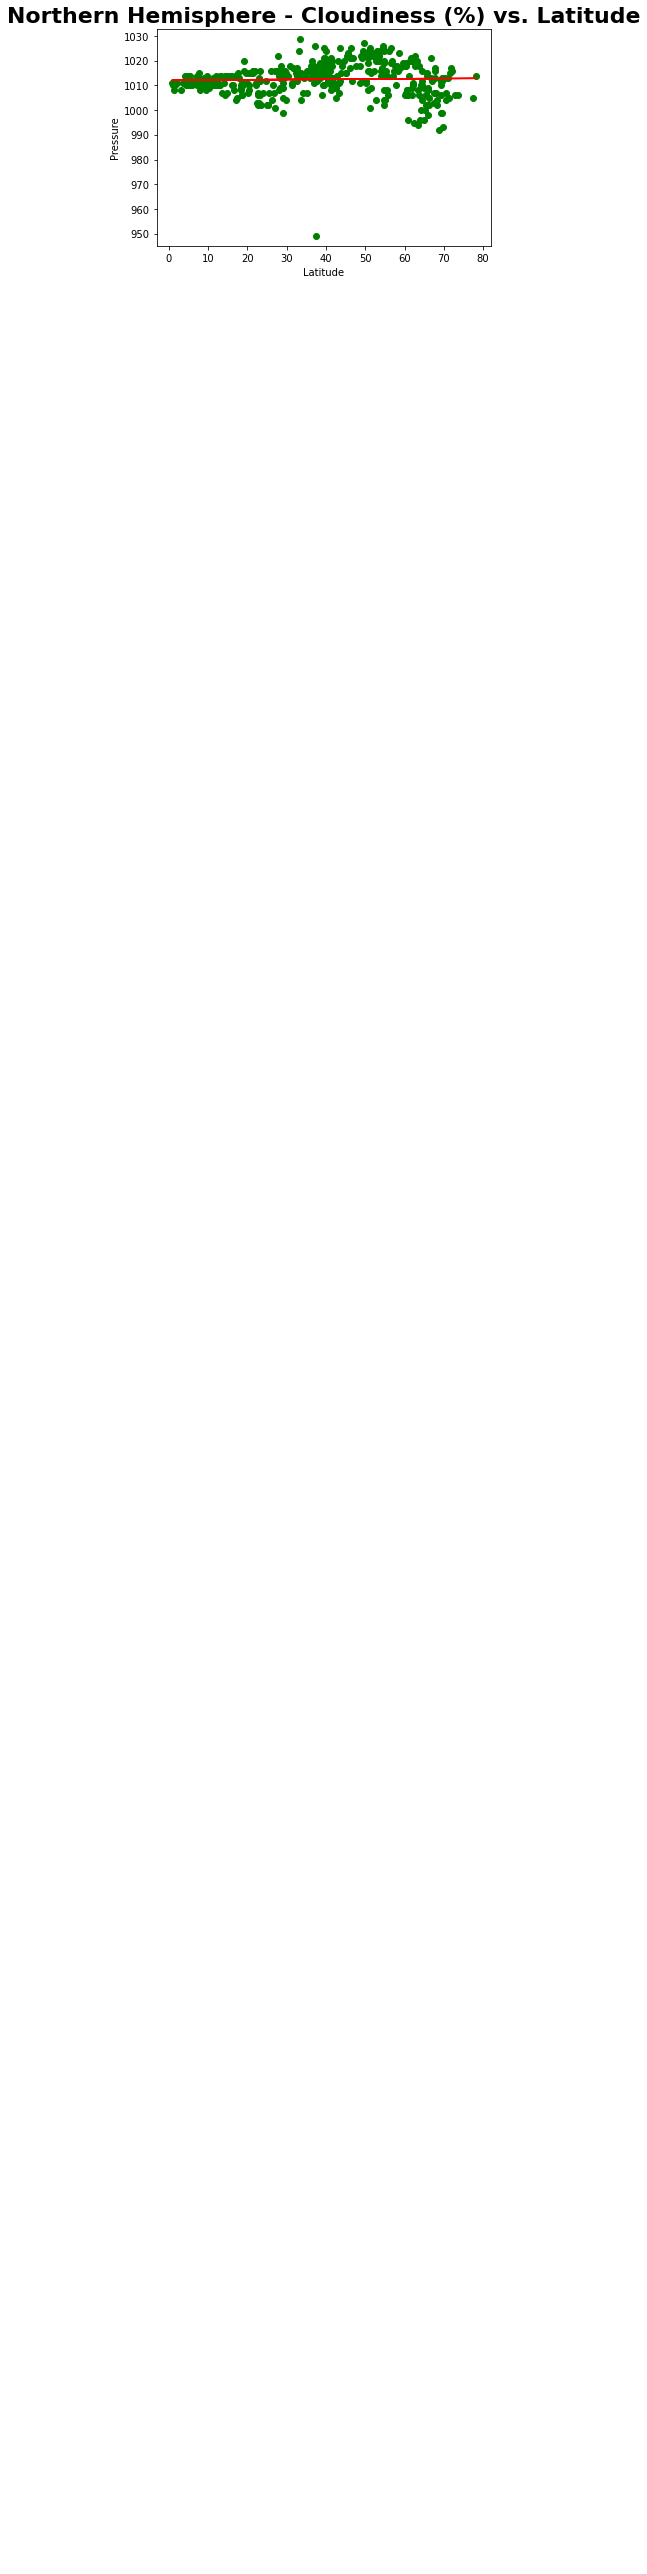

In [74]:
x_values = north_df['Latitude']
y_values = north_df['Pressure']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Pressure')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude", fontsize=22, fontweight="bold")
# print(f"The r-squared is: {results.rsquared}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [84]:
# Regression Latitude vs Pressure - Northern Hemisphere
feature = north_df[["Latitude"]]
target = north_df["Pressure"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Pressure   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3270
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.568
Time:                        09:51:11   Log-Likelihood:                -1333.0
No. Observations:                 396   AIC:                             2670.
Df Residuals:                     394   BIC:                             2678.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1012.1178      0.756   1339.054      0.000    1010.632    1013.604
Latitude       0.0100      0.017      0.572      0.568      -0.024       0.044
==============================================================================
Omnibus:                      232.745   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4582.020
Skew:                          -2.068   Prob(JB):                         0.00
Kurtosis:                      19.143   Cond. No.                         93.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08837805863863755


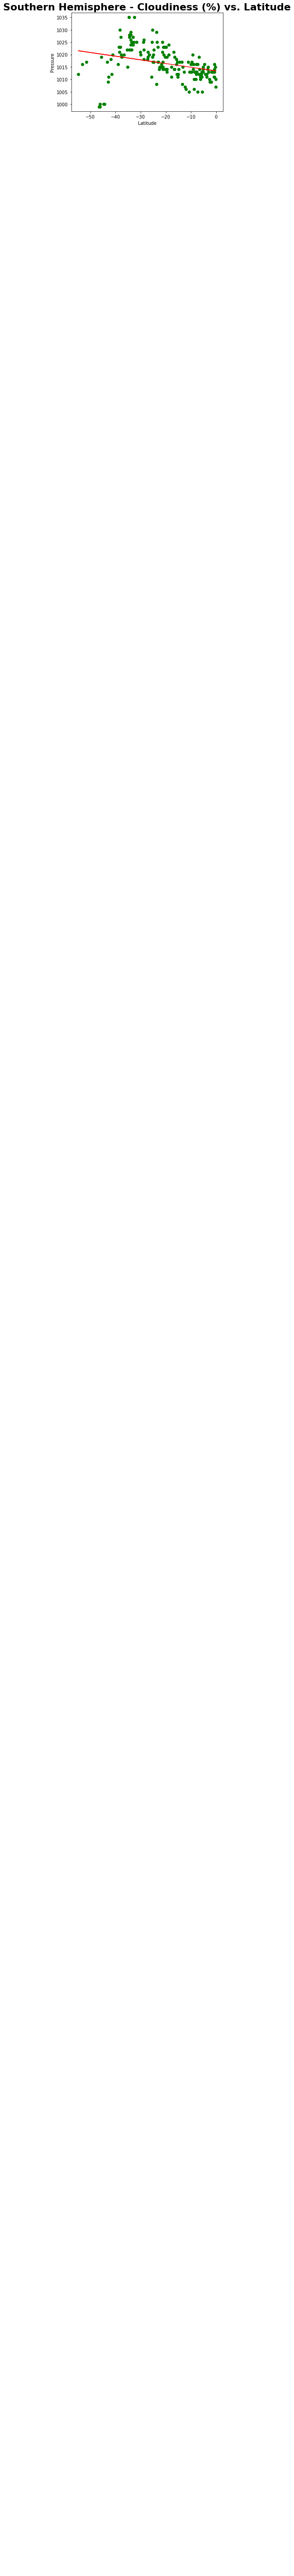

In [75]:
x_values = south_df['Latitude']
y_values = south_df['Pressure']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Pressure')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude", fontsize=22, fontweight="bold")
# print(f"The r-squared is: {results.rsquared}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [85]:
# Regression Latitude vs Pressure - Southern Hemisphere
feature = south_df[["Latitude"]]
target = south_df["Pressure"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Pressure   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     16.48
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           7.48e-05
Time:                        09:51:39   Log-Likelihood:                -565.10
No. Observations:                 172   AIC:                             1134.
Df Residuals:                     170   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1013.4002      0.897   1129.376      0.000    1011.629    1015.171
Latitude      -0.1485      0.037     -4.060      0.000      -0.221      -0.076
==============================================================================
Omnibus:                       25.787   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.078
Skew:                          -0.700   Prob(JB):                     8.10e-12
Kurtosis:                       5.273   Cond. No.                         44.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0038591732448271555


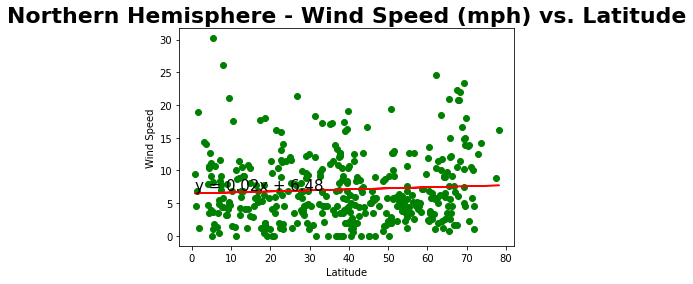

In [77]:
x_values = north_df['Latitude']
y_values = north_df['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude", fontsize=22, fontweight="bold")
# print(f"The r-squared is: {results.rsquared}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [88]:
# Regression Latitude vs Wind Speed - Northern Hemisphere
feature = north_df[["Latitude"]]
target = north_df["Wind"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wind   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.526
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.217
Time:                        09:52:47   Log-Likelihood:                -1212.1
No. Observations:                 396   AIC:                             2428.
Df Residuals:                     394   BIC:                             2436.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4810      0.557     11.634      0.000       5.386       7.576
Latitude       0.0159      0.013      1.235      0.217      -0.009       0.041
==============================================================================
Omnibus:                       76.773   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.098
Skew:                           1.148   Prob(JB):                     2.52e-28
Kurtosis:                       4.559   Cond. No.                         93.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009248133060631422


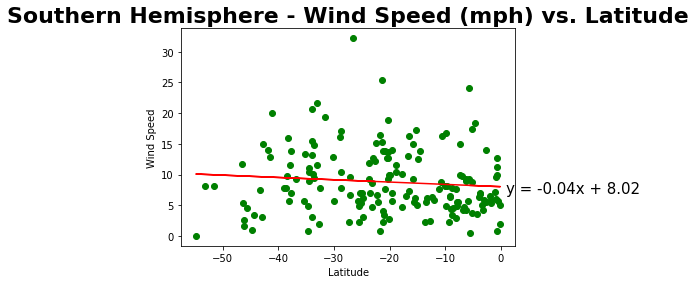

In [78]:
x_values = south_df['Latitude']
y_values = south_df['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude", fontsize=22, fontweight="bold")
# print(f"The r-squared is: {results.rsquared}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [89]:
# Regression Latitude vs Wind Speed - Southern Hemisphere
feature = south_df[["Latitude"]]
target = south_df["Wind"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wind   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.587
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.210
Time:                        09:53:16   Log-Likelihood:                -530.02
No. Observations:                 172   AIC:                             1064.
Df Residuals:                     170   BIC:                             1070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0187      0.732     10.958      0.000       6.574       9.463
Latitude      -0.0376      0.030     -1.260      0.210      -0.096       0.021
==============================================================================
Omnibus:                       34.065   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.730
Skew:                           1.038   Prob(JB):                     2.15e-12
Kurtosis:                       4.786   Cond. No.                         44.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""